# Guided Project: Building A Handwritten Digits Classifier

In this Guided Project, we'll:

    explore why image classification is a hard task
    observe the limitations of traditional machine learning models for image classification
    train, test, and improve a few different deep neural networks for image classification

Why is image classifcation a hard task?

Within the field of machine learning and pattern recognition, image classification (especially for handwritten text) is towards the difficult end of the spectrum. There are a few reasons for this.

First, each image in a training set is high dimensional. Each pixel in an image is a feature and a separate column. This means that a 128 x 128 image has 16384 features.

Second, images are often downsampled to lower resolutions and transformed to grayscale (no color). This is a limitation of compute power unfortunately. The resolution of a 8 megapixel photo has 3264 by 2448 pixels, for a total of 7,990,272 features (or about 8 million). Images of this resolution are usually scaled down to between 128 and 512 pixels in either direction for significantly faster processing. This often results in a loss of detail that's available for training and pattern matching.

Third, the features in an image don't have an obvious linear or nonlinear relationship that can be learned with a model like linear or logistic regression. In grayscale, each pixel is just represented as a brightness value ranging from 0 to 256. 

Why is deep learning effective in image classification?

Deep learning is effective in image classification because of the models' ability to learn hierarchical representations. At a high level, an effective deep learning model learns intermediate representations at each layer in the model and uses them in the prediction process.

In this Project, we'll explore the effectiveness of deep, feedforward neural networks at classifying images.

Scikit-learn contains a number of datasets pre-loaded with the library, within the namespace of sklearn.datasets. The load_digits() function returns a copy of the hand-written digits [dataset](http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) from UCI that will be used in this project.

In [39]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Load data
data, target = load_digits(return_X_y = True)
features= pd.DataFrame(data)
target= pd.Series(target)

In [41]:
features.head(3)

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0


Because dataframes are a tabular representation of data, each image is represented as a row of pixel values. To visualize an image from the dataframe, we need to reshape the image back to its original dimensions in pixels(8 x 8 pixels). To visualize the image, we need to reshape these pixel values back into the 28 by 28 and plot them on a coordinate grid.

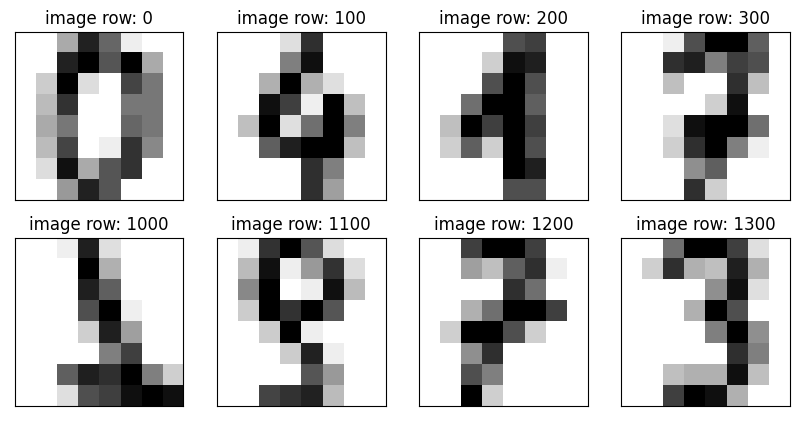

In [42]:
# View Images
rows= [0,100,200,300,1000,1100,1200,1300]

fig= plt.figure(figsize=(10,5))
n = 0
for r in rows:
    image= features.iloc[r]
    np_image= image.values
    np_image= np_image.reshape(8,8)
    ax= fig.add_subplot(2,4,n+1)
    n+= 1
    ax.set_title("image row: %i"%r)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.imshow(np_image, cmap= "gray_r")
    
plt.show()

### 4-Fold KNeighbors Classifiction

In [43]:
# Set train and test df
split = round(len(features) * 0.8)
feature_train = features[:split]
feature_test = features[split:]

target_train = target[:split]
target_test = target[split:]

In [44]:
# define functions to model and test Kneighbors accuracy on image data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold

def train(train_features, train_target, neighbors = 1):
    knn = KNeighborsClassifier(n_neighbors = neighbors)
    fitted = knn.fit(train_features, train_target)
    return fitted

def test(model, test_feature, test_target):
    preds = model.predict(test_feature)
    accuracy = accuracy_score(test_target, preds)
    return accuracy

def cross_validate(k, n_splits, features, target):
    fold_accuracies = []
    kf = KFold(n_splits = n_splits, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        model = train(train_features, train_target, k)
        overall_accuracy = test(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies 

In [45]:
# For different values of k
ks = []
accuracies = []
for k in range(1,11):
    accuracy = cross_validate(k,4, features, target)
    accuracies.append(np.mean(accuracy))
    ks.append(k)
    

In [46]:
print(accuracies)

[0.9888728037614452, 0.9821912892848305, 0.9872011878247959, 0.9833073496659243, 0.9849777282850779, 0.9827517941103686, 0.9844221727295223, 0.9805270972531551, 0.9827567433803515, 0.9788591932689928]


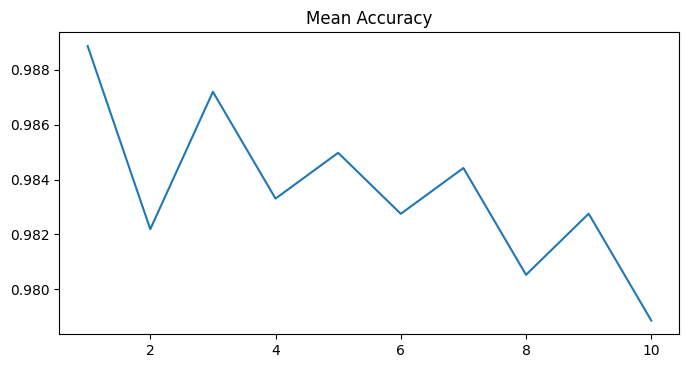

In [47]:
# plot of varying mean accuracies against varying K-values
plt.figure(figsize=(8,4))
plt.title("Mean Accuracy")
plt.plot(ks, accuracies)
plt.show()

There are a few downsides to using k-nearest neighbors:

    high memory usage (for each new unseen observation, many comparisons need to be made to seen observations)
    no model representation to debug and explore

Let's now try a neural network with a single hidden layer. Use the MLPClassifier package from scikit-learn.

### 4-Fold Cross Validation of Neural Network With Single layer

In [48]:
from sklearn.neural_network import MLPClassifier

def train_nn(neurons, train_features, train_target):
    nn = MLPClassifier(hidden_layer_sizes = (neurons,), max_iter=3000)
    fitted = nn.fit(train_features, train_target)
    return fitted

def test_nn(model, test_feature, test_target):
    preds = model.predict(test_feature)
    accuracy = accuracy_score(test_target, preds)
    return accuracy

def cross_validate(neurons,folds, features, target):
    fold_accuracies = []
    kf = KFold(n_splits = folds, random_state=2, shuffle=True)
    for train_index, test_index in kf.split(features):
        train_features, test_features = features.loc[train_index], features.loc[test_index]
        train_target, test_target = target.loc[train_index], target.loc[test_index]
        
        model = train_nn(neurons, train_features, train_target) 
        overall_accuracy = test_nn(model, test_features, test_target)
        fold_accuracies.append(overall_accuracy)
    return fold_accuracies 


In [49]:
neurons = [8, 16, 32, 64, 128, 256]
mean_accuracies = []
for i in neurons:
    res = cross_validate(i,4, features, target)
    mean_acc = np.mean(res)
    mean_accuracies.append(mean_acc)

In [50]:
mean_accuracies

[0.9276676565206632,
 0.9543702053947043,
 0.9621615936649344,
 0.9666184112843356,
 0.9749665924276169,
 0.9783024003959416]

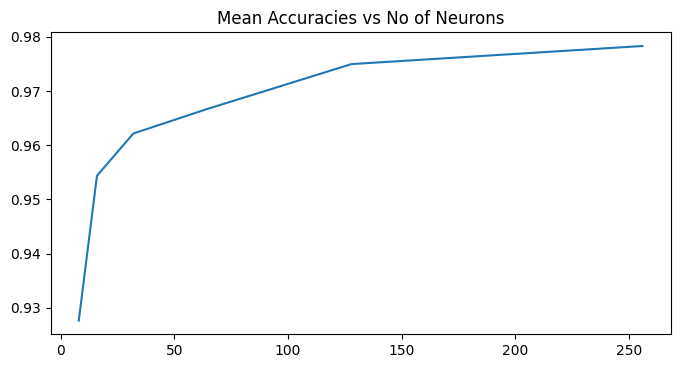

In [51]:
# plot of mean accuracies against varying number of neurons
plt.figure(figsize=(8,4))
plt.title("Mean Accuracies vs No of Neurons")
plt.plot(neurons, mean_accuracies)
plt.show()

Adding neurons to a single layer could already generate accurate of about 97%. Lets us see adding more layers could affect the model. Also this model performed worse than the KNeighbors model which achieved an accuracy of 98%.

### 4-Fold Cross Validation of Neural Network With 2 Hidden layers of varying Neurons

In [52]:
def train_nn(neurons, train_features, train_target):
    nn = MLPClassifier(hidden_layer_sizes = (neurons,neurons), max_iter=3000)
    fitted = nn.fit(train_features, train_target)
    return fitted

neurons = [64, 128, 256]
mean_accuracies = []
for i in neurons:
    res = cross_validate(i,4, features, target)
    mean_acc = np.mean(res)
    mean_accuracies.append(mean_acc)

In [53]:
print(mean_accuracies)

[0.964390002474635, 0.9794147488245484, 0.9810838901262063]


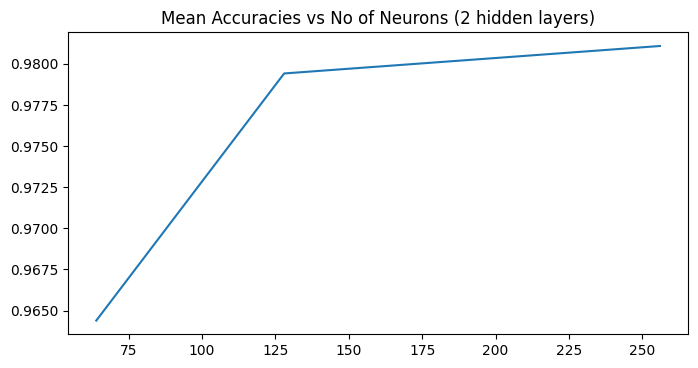

In [54]:
# plot of mean accuracies against varying number of neurons
plt.figure(figsize=(8,4))
plt.title("Mean Accuracies vs No of Neurons (2 hidden layers)")
plt.plot(neurons, mean_accuracies)
plt.show()

increasing the layers to two only caused a marginal improvement to the model. Bringing it from 97 to 98%. An increase of 1% may not the worth the computational resources needed for the added hidden layer. One should normally be concerned about overfitting, however the nature of cross-validation with k-Folds in this case 4-folds is assurance that this model is not overfitting. However if the test-dataset achieve about 98% accuracy, testing on training data-set cannot be much higher.

### 4-Fold Cross Validation of Neural Network With 3 Hidden layers of varying Neurons

In [55]:
def train_nn(neurons, train_features, train_target):
    nn = MLPClassifier(hidden_layer_sizes = (neurons,neurons,neurons), max_iter=3000)
    fitted = nn.fit(train_features, train_target)
    return fitted

neurons = [10, 64, 128]
mean_accuracies = []
for i in neurons:
    res = cross_validate(i,6, features, target)
    mean_acc = np.mean(res)
    mean_accuracies.append(mean_acc)

In [56]:
print(mean_accuracies)

[0.9382367149758454, 0.972736900780379, 0.9766350798959493]


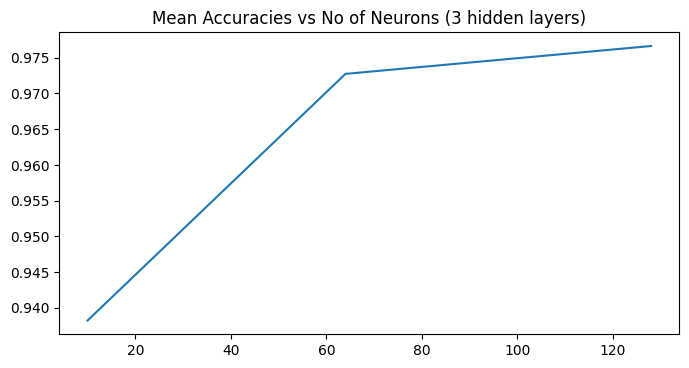

In [57]:
# plot of mean accuracies against varying number of neurons
plt.figure(figsize=(8,4))
plt.title("Mean Accuracies vs No of Neurons (3 hidden layers)")
plt.plot(neurons, mean_accuracies)
plt.show()

### Conclusion

While using more hidden layers is known to increase the amount of overfitting that happens. We increased the k-fold cross validation to 6 while testing 3 hidden layers network. The result, model performance dropped to between 93% and 97% depending on the number of neurons used. This shows reduction in the noise captured by our model, however at neurons of 64 and 128 across all hidden layers, an accuracy of 97% is achieved indicating a well performing model. 